# Neural Network from scratch
Gradiente, funzione d'attivazione, pesi, bias, loss function: sono solo alcuni dei concetti che danno vita ad una Rete Neurale.<br>
Sul web sono presenti ottime spiegazioni di ognuno di questi concetti ed ottime librerie (PyTorch, Keras, TensorFlow) che implementano ognuna delle peculiarità sopra citate.<br> 
Tuttavia spesso ottime spiegazioni teoriche non vengono affiancate ad esempi pratici che fanno capire l'effettivo funzionamento della rete.<br><br>

Questo tutorial è stato realizzato con lo scopo di riassumere i concetti fondamentali che stanno dietro il funzionamento di una Rete Neurale affiancando ogni step all'implementazione ad esso associata, così da comprendere fino in fondo il funzionamento effettivo.</br>
Alla fine di questo tutorial saranno disponibili diverse classi che consentiranno la costruzione e l'utilizzo di una Rete Neurale.


## Cosa è una Rete Neurale Artificale
Una <b>Rete Neurale Artificaile</b> (ANN o NN) è un modello computazinale composto dall'interconnessione di unità base chiamate <b>Neuroni</b>.</br>
Di seguito viene proposta un'immagine tratta da Wikipedia che esemplifica come i neuroni di una rete si interlacciano tra loro:
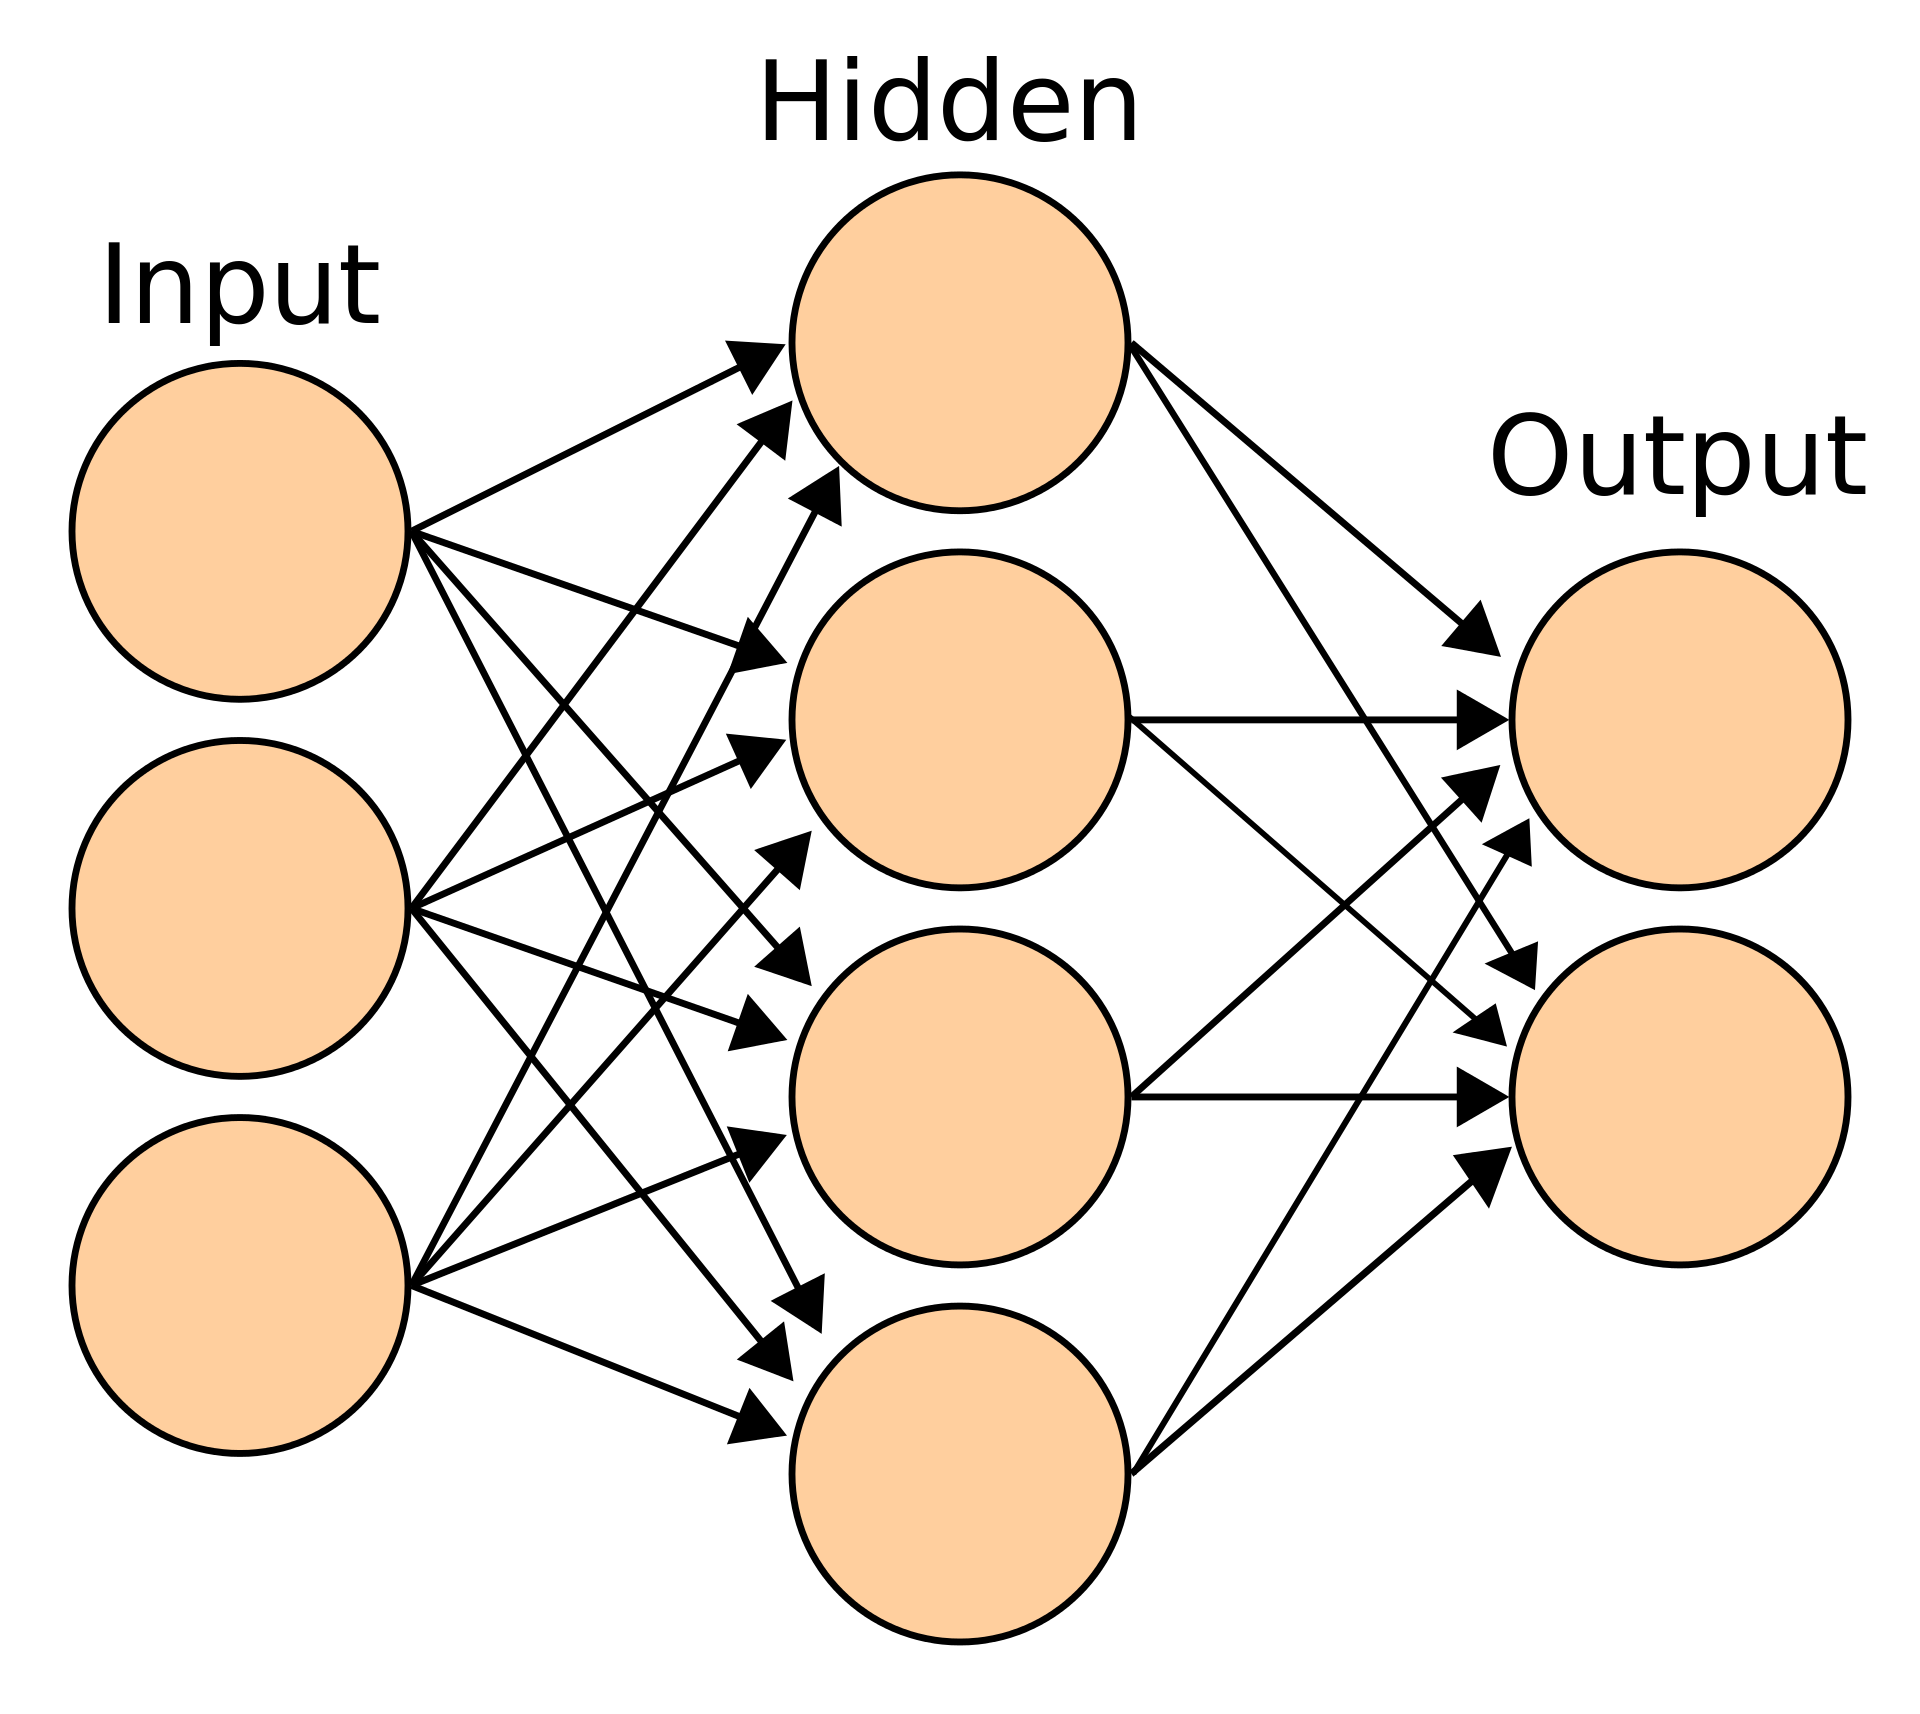
Dall'immagine è possibile notare la presenza di diversi livelli, chiamati nel gergo <b>layer</b>:
- Input Layer: livello di input, che funge da ingresso per i dati che verranno dati in pasto alla rete
- Hidden Layer: livello (o livelli) intermedi, situati tra il livello di input e di output
- Output Layer: strato finale della rete, che produce l'output della rete (tipicamente la predizione rispetto ad uno o più input)

La combinazione di più livelli da vita a quello che oggi viene chiamato <b>Deep Learning</b>: il termine Deep viene associato proprio alla presenza di più livelli che danno vita ad una rete <i>profonda</i>.

### Perchè utilizzare un'ANN
Nella forma più comune le reti neurali vengono utilizzate per svolgere un'analisi predittiva: a patire da un input (features) si vuole conoscere quale sarà il valore dell'output (classe di output) con una certa probabilità. </br>
Di seguito alcuni esempi d'utilizzo:
- Predire, a partire dalle caratteristiche di una pianta (lunghezza e larghezza dei sepali e dei petali), la tipologia di pianta: questo task verrà affrontato alla fine di questo modulo
- Riuscire a classificare un elemento presente in un'immagine: task di <b>Computer Vision</b> tipicamente svolto con l'utilizzo di <b>Reti Neurali Convoluzionali</b> (<b>CNN</b>)
- Riuscire a comprendere il topic o tradurre un testo: task di <b>Natural Language Processing</b> svolto tipicamente con <b>Reti Neurali Ricorrenti</b> (<b>RNN</b>)

Queste sono solo alcune delle innumerevoli applicazioni che trovano le reti neurali oggi giorno.

### Flow di lavoro
In un tipico scenario di lavoro si può immaginare di partire da un set di dati contenente le features che rappresentano l'item che verrà dato in input alla rete e le classi che vorranno essere predette.<br>
Partire dalle features per arrivare alla fase finale di predizione porta dentro diversi step che vengono elencati di seguito:
- Preprocessing: consiste nella preparazione del dato in un formato adatto per essere dato in input alla rete
- Train/Test Split: comprende la divisione del set di dati iniziale in due set di dati differenti: <b>Training Set</b> e <b>Test Set</b>. Il primo verrà utilizzato per la frase di training, mentre il secondo per la fase di testing (entrambe le fasi sono spiegate nel seguito). </br> Tipicamente il il Training Set corrisponde all'80% del set di dati iniziale, mentre il restante 20% viene assegnato al Test Set.
- Training: fase in cui viene addestrato il modello nel predire il risultato desiderato. Tale fase consiste di più iterazioni (epoche) in cui pian piano vengono corretti i paramtri della rete per predire il risultato desiderato. Per tale fase viene utilizzato il Training Set creato nello step precedente. 
- Test: a seguito della fase di training, può essere utilizzato il Test Set per verificare la qualità della rete. 

Si precisa che tali step fanno riferimento ad uno scenario d'utilizzo generico.
A questi possono essere aggiunti step di processo tipici del dominio di riferimento: ad esempio, nel caso del Natural Language Processing, prima di dare in input alla rete le features vengono compiuti i passi di Stemming, Lemming, Tokenizzazione, conversione delle stringhe in un dominio numerico ed altro.

### I framework più famosi
Questo tutorial si pone come scopo la spiegazione delle componenti base e delle peculiarità che fanno parte di una Rete Neurale, implementando step by step le varie componenti. </br>
In uno scenario d'utilizzo reale possono (e devono) essere utilizzati dei framework che già implementano le parti e gli step che compongono la costruzione di una rete.<br>
Di seguito alcuni di questi:
- PyTorch
- TensorFlow
- Keras

## L'unita base: il Neurone
L'unità base della rete è il <b>Neurone</b>. <br>
Questo nella sua forma più semplice è un classificatore lineare binario, capace di apprendere la regola necessaria per riconoscere due classi linearmente separabili. <br>
Un neurone è composto da:
- Uno o più valori in input
- Uno o più pesi (un peso per ogni input)
- un bias

Per comprendere il vero significato del neurone, supponiamo di avere un solo input (conseguentemente un solo peso).<br>

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

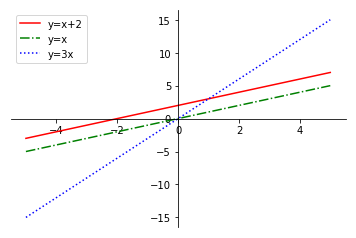

In [2]:
x = np.linspace(-5,5,100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Set dell'asse X e Y al centro (0, 0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plot delle linee
plt.plot(x, x+2, '-r', label='y=x+2')
plt.plot(x, x,'-.g', label='y=x')
plt.plot(x, 3*x,':b', label='y=3x') 

# Set della legenda
plt.legend(loc='upper left')

# Show
plt.show()



Dal grafico si può capire cosa rappresentano in un neurone il peso e il bias :
- Il peso rappresenta il coefficente angolare della retta: si può infatti vedere come varia la pendenza al variare del peso (3 e 1 nell'esempio)
- Il bias rappresenta l'ordinata all'origine, ovvero il punto d'interesezione tra la retta e l'asse delle ordinate (nell'esempio 2 e 0)

Nella realtà un neurone avrà più input e di conseguenza più pesi. di seguito un esempio.

In [3]:
# Input del neurone
inputs = [1.2, 5.1, 2.1]

# Pesi del neurone
weights = [3.1, 2.1, 8.7]

# Bias del neurone
bias = 3

# Output del neurone
output= inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

35.7


### Il concetto di Batch
In uno scenario reale, la rete riceve in ingresso un chunk composto da 1 a N elementi, dove N è la dimensione del set di dati in ingresso. <br>
Soprattutto nella fase di training, è uso comune dividere il training set in diversi chunk da dare in pasto alla rete.<br>
Nell'esempio sotto, abbiamo 3 elementi ognuno composto da 4 features.<br>
Nel caso di un solo neurone, si avranno in output 3 risultati, corrispondenti al numero di input in ingresso.

In [4]:
# Input alla rete: 3 elementi da 4 features
inputs = [
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

# Pesi di un neurone
weights = [0.2, 0.8, -0.5, 1.0]


# Bias del neurone
biases = 3

# Per calcolare efficacemente l'output, può essere utilizzato il dot product tra matrici 
outputs = np.dot(np.array(inputs), np.array(weights).T) + biases

print("Outputs:")
for i, output in enumerate(outputs):
    print(f" - Per input {i+1}: {output:.2f}" )

Outputs:
 - Per input 1: 5.80
 - Per input 2: 9.90
 - Per input 3: 2.41


Nel caso di più neuroni, le variabili <i>weights</i> e <i>biases</i> diventeranno rispettivamente una matrice e un vettore 

In [5]:
# Input alla rete: 3 elementi da 4 features
inputs = [
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]

# Pesi di 3 neuroni
weights = [
    [0.2, 0.8, -0.5, 1.0], 
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

# Bias dei 3 neuroni
biases = [2, 3, 0.5]

# Per calcolare efficacemente l'output, può essere utilizzato il dot product tra matrici 
layer_outputs = np.dot(np.array(inputs), np.array(weights).T) + biases

print("Outputs:")
for i, neuron in enumerate(layer_outputs):
    print(f" - Per neurone {i+1}:" )
    for j, output in enumerate(neuron):
        print(f" -- Per input {j+1}: {output:.2f}")
    print('')

Outputs:
 - Per neurone 1:
 -- Per input 1: 4.80
 -- Per input 2: 1.21
 -- Per input 3: 2.38

 - Per neurone 2:
 -- Per input 1: 8.90
 -- Per input 2: -1.81
 -- Per input 3: 0.20

 - Per neurone 3:
 -- Per input 1: 1.41
 -- Per input 2: 1.05
 -- Per input 3: 0.03



### Creazione dell'oggetto Dense e il metodo Forward
Il pezzo di codice successivo definisce la classe <b>Dense</b>.<br>
Con la classe Dense definiamo una classe Python che implementa in maniera efficace gli step eseguiti nelle celle precedenti. <br>
In particolare, il metodo che implementa il calcolo dell'output a partire dall'input (x\*w + b nel nostro caso) viene chiamato <b>forward</b>.</br>
Lo step di <b>forward-propagation</b> nel gergo identifica lo step nella quale un input viene propagato all'interno della rete per poi ottenere l'output della rete stessa. 

In [6]:
# Input della rete
X = np.array(
    [
        [1, 2, 3],
        [2.0, 5.0, -1.0],
        [-1.5, 2.7, 3.3]
    ]
)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Nel costruttore vengono inizializzati i pesi e i bias
        # - Nel nostro caso i pesi vengono inizializzati random.
        # - La backpropagation correggerà i pesi
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) 
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# Definizione layer 1 (input di 3 features in ingresso a 4 neuroni)
layer1 = Layer_Dense(3, 4)
# Definizione layer 2 (input di 4 features dato dall'output del neurone precedente, in output 2 features)
layer2 = Layer_Dense(4, 2)

# propagazione dell'input nella rete
layer1.forward(X)
layer2.forward(layer1.output)

print(layer2.output)

[[ 0.10725826 -0.05537155]
 [ 0.18391915 -0.03208459]
 [ 0.03399851 -0.0158004 ]]


Si noti che il pezzo di codice sopra implementa esattamente la rete presentata all'inizio di questo notebook:
- Input di 3 features
- Hidden Layer di 4 neuroni
- 2 classi in output
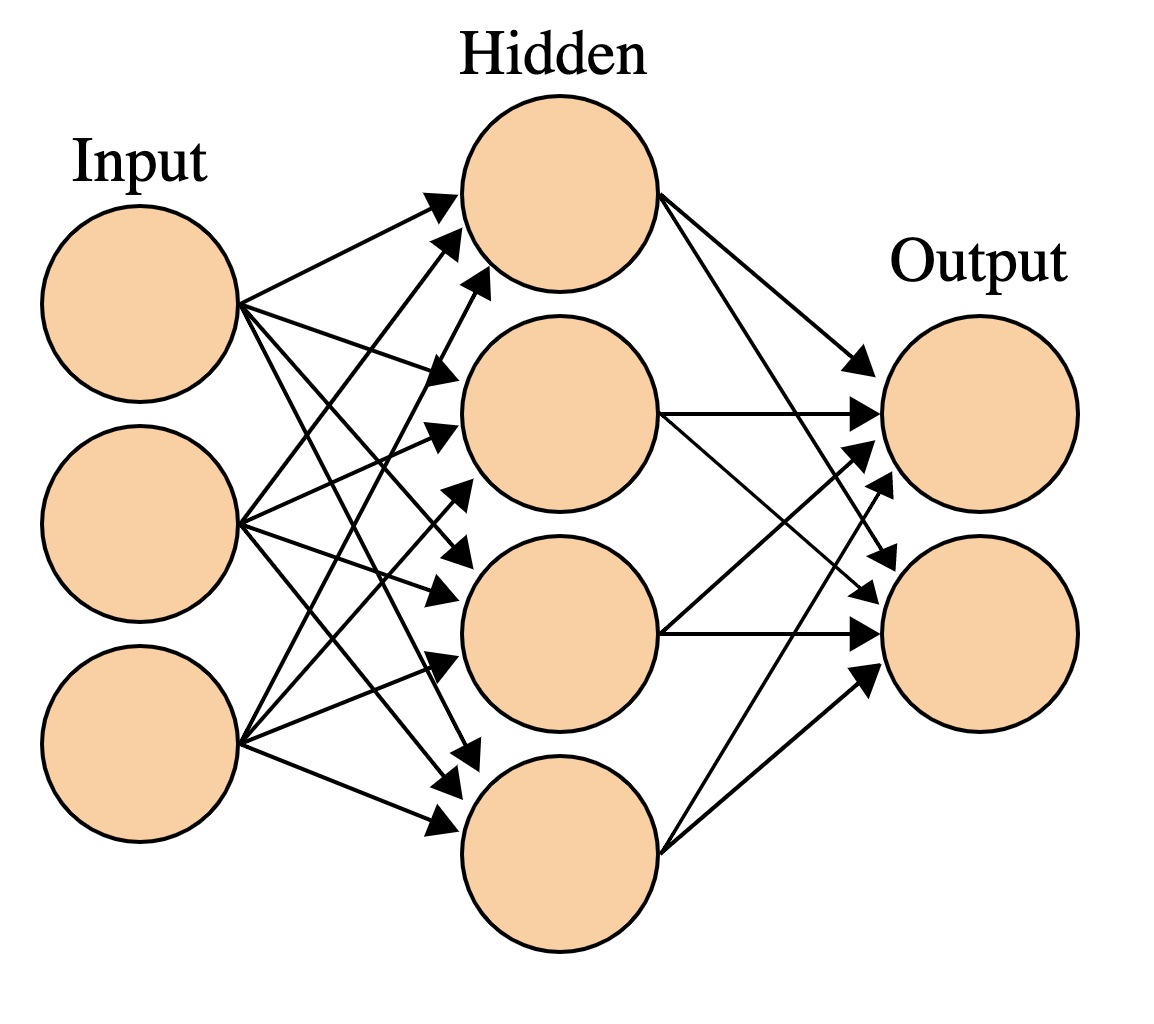

A tendere, si può immaginare questa come una rete capace di predirre due classi di output.<br>
I valori presenti in <i>layer2.output</i> si possono immaginare come i valori che indicano l'appartenenza di un item alla classe 1 o 2.<br><br>
Per essere precisi, la sola composizione di Layer Dense non corrisponde all'implementazione di una vera e propria rete. <br>
Infatti, tra un Layer e un altro, viene posta una funzione chiamata <b>Activation Function</b>. Nel prossimo paragrafo verrà spiegata cosa è l'Activation Function e perchè è importante. 



## Activation Function: cosa è e perchè è importante
Una rete neurale formata solo da strati Dense è una rete funzionante che può essere utilizzata. <br>
Tuttavia questa presenta un grande difetto: poichè questa è formata da sole funzioni lineari (x\*w + b), essa sarà capace di risolvere solamente problemi su uno spazio lineare. <br>
Abbiamo bisogno di introdurre qualcosa che rompa la linearità della rete: un modo è utilizzare una funzione non lineare da porre in output di un neurone (in sostanza tra l'output di un neurone e l'input successivo). <br>
La combinazione di diversi layer, unita all'utilizzo di una funzione di attivazione, consentirà di risolvere anche problemi non lineari.

Esistono diverse funzioni di attivazione (Step Function, Sigmoid, ReLU, Leaky ReLU...), in questo notebook verranno utilizzate le funzioni <b>ReLU</b> e <b>Softmax</b>. 

### ReLU Activation Function
La funzione ReLU è definita come:
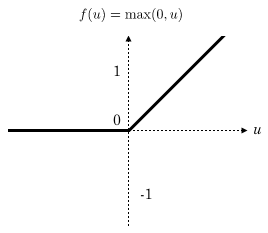
<br>


In [7]:
def ReLU(x):
    """
        Implementazione della funzione di attivazione Rectified Linear Unit (ReLU).
        f(x) = max(0, x)
    """
    return max(0, x)

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = [ReLU(input) for input in inputs]

print('Applicazioni della ReLU:')
for i in range(0, len(inputs)):
    print(f"- ReLU({inputs[i]}) -> {outputs[i]}")

Applicazioni della ReLU:
- ReLU(0) -> 0
- ReLU(2) -> 2
- ReLU(-1) -> 0
- ReLU(3.3) -> 3.3
- ReLU(-2.7) -> 0
- ReLU(1.1) -> 1.1
- ReLU(2.2) -> 2.2
- ReLU(-100) -> 0


In [8]:
# Definzione classe ReLU
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


# Definizione layer 1 (input di 3 features in ingresso a 4 neuroni)
layer1 = Layer_Dense(3, 4)
# Definizione layer 2 (input di 4 features dato dall'output del neurone precedente, in output 2 features)
layer2 = Layer_Dense(4, 2)

# Definizione activation function 
activation1 = Activation_ReLU()

# propagazione dell'input nella rete
layer1.forward(X)
activation1.forward(layer1.output) # Aggiunta dell'activation function tra layer1 e layer2
layer2.forward(activation1.output)

print(layer2.output)

[[-0.04853947 -0.1100374 ]
 [-0.01963617 -0.07162028]
 [-0.14049781 -0.30304637]]


### Funzione Softmax
E' stato detto in precedenza che il valore in output della rete deve rappresentare in qualche modo la <i>probabilità</i> che un certo input appartenga ad una certa classe. <br>
La funzione Softmax fa al caso nostro: essa calcola la probabilità che un certo input appartenga ad una certa classe.
![img](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/10/17014509/softmax.png)

In [9]:
layer_outputs = [
     [0.03041336, 0.09144674],
     [0.05007828, 0.26172163],
     [0.03802576, 0.11714258]
    ]

exp_values = np.exp(layer_outputs)
result = exp_values / np.sum(exp_values, axis=1, keepdims=True)

print(result) 

# si noti come la somma delle righe dia 1
np.sum(result, axis=1)

[[0.48474639 0.51525361]
 [0.44728578 0.55271422]
 [0.48023111 0.51976889]]


array([1., 1., 1.])

In [10]:
# Definizione della classe Softmax
class Activation_Softmax:
    def forward(self, inputs):
        # calcolo della Softmax
        # Si noti come viene sottratto ad ogni valore in input il massimo valore presente 
        # all'interno del vettore di input.
        # Perchè? 
        # Questo viene fatto per evitare l'overflow (e^n può causare overflow per n grande)
        # Questa operazione non incide minimamente sul calcolo della softmax
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [11]:
# Definizione layer 1 (input di 3 features in ingresso a 4 neuroni)
layer1 = Layer_Dense(3, 4)
# Definizione layer 2 (input di 4 features dato dall'output del neurone precedente, in output 2 features)
layer2 = Layer_Dense(4, 2)

# Definizione activation function 
activation1 = Activation_ReLU()

# Definizione softmax
activation2 = Activation_Softmax()

# propagazione dell'input nella rete
layer1.forward(X)
activation1.forward(layer1.output) 
layer2.forward(activation1.output)
activation2.forward(layer2.output) # Aggiunta della softmax in output della rete

print(activation2.output)
print(np.sum(activation2.output, axis=1))

[[0.49683174 0.50316826]
 [0.4949745  0.5050255 ]
 [0.49941476 0.50058524]]
[1. 1. 1.]


Si noti che è stato completato il passo di forward:
- Definizione layer della rete (Layer Dense)
- Definizione della funzione di attivazione per i layer intermedi (ReLU) e per il layer di output (Softmax)

## Il concetto di errore: Loss Function
La funzione <i>__init()__</i> della classe <i>Layer_Dense</i> inizializza randomicamente i pesi della rete e i bias dei neuroni.<br>
Si noti inoltre che la rete definita funziona correttamente, ma in output ritorna valori senza un appartente senso.
Da ora in poi il nostro scopo sarà capire come poter configurare correttamente i pesi e i bias della rete così da avere in output delle predizioni corrette. <br>
Lo step nella quale vengono corretti i pesi e i bias della rete viene chiamato <b>Backpropagation</b>.
Tuttavia, prima di entrare nel merito della backpropagation, bisogna definire un metodo per misurare quello che è l'errore commesso dalla rete rispetto ad una predizione desiderata.
L'errore nel gergo viene chiamato <b>loss</b> e viene calcolato utilizzando una <b>loss function</b>. <br>
Nel prossimo paragrafo verrà spiegata la <b>Categorical Cross Entropy</b>.

### Categorical Cross Entropy
Nel caso di una classificazione binaria o multiclasse, per valutare l'errore commesso da una rete, può essere utilizzata la <b>Categorical Cross Entropy</b>.
Si precisa che la funzione di loss può dipendere dal domionio in esame: ad esempio, nel caso di problemi di regressione, può essere utilizzata la Root Mean Square Error.<br><br>
La Categorical Cross Entropy viene definita come segue:
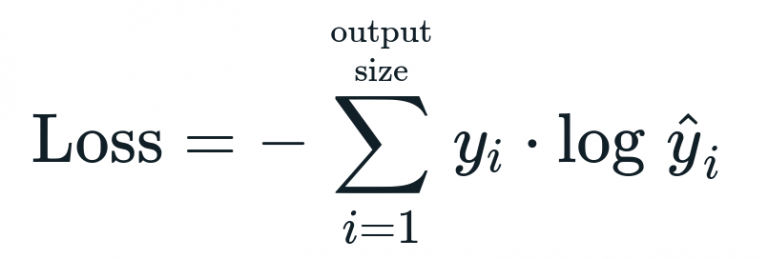
dove:
- $y_{i}$ rappresenta il valore reale
- $\hat{y}_{i}$ rappresenta il valore in output della softmax

Di seguito un esempio per un input:
- Numero di classi: 3
- Etichetta di classe dell'input corrente: 0
- One-Hot Encoding per la classe 0: \[1, 0, 0\]
- Risultato della Softmax: \[0.7, 0.1, 0.2\]

<center>$Loss = -(1\cdot\log(0.7) + 0\cdot\log(0.1) + 0\cdot\log(0.2))$</center>

Si noti che tanto più è alto il valore della softmax per l'output corretto, tanto più basso sarà il valore della loss.

In [12]:
# Valori predetti dalla rete (come l'esempio di cui sopra)
y_pred = [[0.7, 0.1, 0.2]]

# Valore corretto (one-hot encoded)
y_true = np.array([[1, 0, 0]])

# Moltiplica y_pred X y_true, in sostanza tiene solo il valore della classe
confidence = np.sum(y_pred*y_true, axis=1)

# Calcola l'errore
loss = -np.log(confidence)

print(loss)

[0.35667494]


In [13]:
# Definizione della Categorical Cross Entropy
class Loss_CategoricalCrossentropy():
    def forward(self, y_pred, y_true): 
        samples = len(y_pred)
        # per evitare il valore della loss pari a infinito
        # si ricorda che log(0) = -inf. 
        # Per evitare questo, si mettono eventuali valori a 0 della y_pred in un valore molto vicino a 0 ma non 0
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)   
        
        if len(y_true.shape) == 1: # calcolo se la y_true non è one-hot encoded
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2: # calcolo se la y_true è one-hot encoded
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        
        # Calcolo della negative loss
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [14]:
# Può essere aggiunta la loss alla rete creata fin ora
X = np.array(
    [
        [1, 2, 3],
        [2.0, 5.0, -1.0],
        [-1.5, 2.7, 3.3]
    ]
)
y = np.array([[0, 1], [1, 0], [0, 1]])

# Definizione layer 1 (input di 3 features in ingresso a 4 neuroni)
layer1 = Layer_Dense(3, 4)
# Definizione layer 2 (input di 4 features dato dall'output del neurone precedente, in output 2 features)
layer2 = Layer_Dense(4, 2)

# Definizione activation function 
activation1 = Activation_ReLU()

# Definizione softmax
activation2 = Activation_Softmax()

# Definizione Categorical Cross Entropy
loss_function = Loss_CategoricalCrossentropy()

# propagazione dell'input nella rete
layer1.forward(X)
activation1.forward(layer1.output) 
layer2.forward(activation1.output)
activation2.forward(layer2.output) 
loss = loss_function.forward(y_pred=layer2.output, y_true=y)

# Viene calcolata la loss per ogni input. 
# Tale valore verrà poi utilizzato per la backpropagation
print(loss) 

[16.11809565  5.274269    6.03428198]


## Backpropagation
La loss trovata nei paragrafi precedenti è utile per variare i valori dei pesi e dei bias, così da <i>minimizzare l'errore</i> commesso dalla rete nella fase di predizione.<br>
Da ora in poi il nostro scopo sarà quindi quello di trovare una metodologia per diminuire il valore della loss. <br>
La backpropagation è il processo che fa al caso nostro: per la spiegazione completa della backpropagation, si fa riferimento al notebook <a href="./02 - Backpropagation.ipynb">02 - Backpropagation</a> dedicato.

### L'implementazione del metodo backward
Di seguito verranno riviste le classi implementate fin ora con l'aggiunta del metodo backward. <br>
Il metodo backward implementa il calcolo del gradiente, utilizzato per diminuire l'errore in uscita dalla rete. <br>
Si noti che, come spiegato nel notebook relativo alla Backpropagation, è stata creata la classe Activation_Softmax_Loss_CategoricalCrossentropy che implementa in maniera sequenziale la funzione d'attivazione Softmax e il calcolo dell'errore tramite Categorical Cross Entropy.<br>
Questo poichè:
- Il calcolo risulta più efficiente
- Il calcolo del gradiente è più leggibile e comprensibile

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Nel costruttore vengono inizializzati i pesi e i bias
        # - Nel nostro caso i pesi vengono inizializzati random.
        # - La backpropagation correggerà i pesi
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons)) 
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        # Vengono salvati gli input così da essere utilizzati nello step di backpropagation
        self.inputs = inputs
        
    def backward ( self , dvalues ):
        # Calcolo del gradiente.
        # dvalues è il gradiente del livello successivo
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis = 0 , keepdims = True ) 
        self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        # Vengono salvati gli input così da essere utilizzati nello step di backpropagation
        self.inputs = inputs
        
    # Backward pass
    def backward ( self , dvalues ):
        # dvalues è il gradiente del livello successivo
        # Viene effettuata una copia così da non modificare i valori 
        # presenti in dvalues (si ricorda che = fa una copia by reference)
        self.dinputs = dvalues.copy()
        # Calcolo del gradiente
        self.dinputs[self.inputs <= 0 ] = 0

class Activation_Softmax:
    def forward(self, inputs):
        # calcolo della Softmax
        # Si noti come viene sottratto ad ogni valore in input il massimo valore presente 
        # all'interno del vettore di input.
        # Perchè? 
        # Questo viene fatto per evitare l'overflow (e^n può causare overflow per n grande)
        # Questa operazione non incide minimamente sul calcolo della softmax
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
    # Backward pass
    def backward ( self , dvalues ):
        # Non implementato. 
        # Verrà utilizzata la classe Activation_Softmax_Loss_CategoricalCrossentropy
        pass

# Classe utilizzata per calcolare la loss come media di tutti gli errori in output
class Loss: 
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses) # Calcolo della media
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true): 
        samples = len(y_pred)
        # per evitare il valore della loss pari a infinito
        # si ricorda che log(0) = -inf. 
        # Per evitare questo, si mettono eventuali valori a 0 della y_pred in un valore molto vicino a 0 ma non 0
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)   

        if len(y_true.shape) == 1: # calcolo se la y_true non è one-hot encoded
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2: # calcolo se la y_true è one-hot encoded
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        # Calcolo della negative loss
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward ( self, dvalues, y_true ):
        # Non implementato. 
        # Verrà utilizzata la classe Activation_Softmax_Loss_CategoricalCrossentropy
        pass
        
# Classe che implementa la combinazione tra Softmax e Categorical Cross Entropy
class Activation_Softmax_Loss_CategoricalCrossentropy ():
    def __init__ ( self ):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        
    # Forward pass
    def forward ( self , inputs , y_true ):
        # Forward pass per la softmax
        self.activation.forward(inputs)
        
        self.output = self.activation.output
        
        # Calcolo della loss e ritorno del valore
        return self.loss.calculate(self.output, y_true)
    
    # Backward pass
    def backward ( self , dvalues , y_true ):
        # Numero di esempi
        samples = len (dvalues)
        
        # Se si ha un encoding one hot, questo viene tradotto come etichetta di classe:
        # [0, 1, 0] -> 1
        if len (y_true.shape) == 2 :
            y_true = np.argmax(y_true, axis = 1 )
        # Copia per evitare la copia by reference
        self.dinputs = dvalues.copy()
        
        # Calcolo del gradiente
        # Come avviente?
        # Viene sottratto 1 al valore della softmax relativo alla ground truth
        self.dinputs[ range (samples), y_true] -= 1
        
        # Normalizzazione del gradiente
        self.dinputs = self.dinputs / samples
        

In [16]:
# Di seguito un esempio di backward

# Valori casuali, simulano l'uscita dalla funzione softmax
softmax_outputs = np.array(
    [[ 0.7 , 0.1 , 0.2 ],
    [ 0.1 , 0.5 , 0.4 ],
    [ 0.02 , 0.9 , 0.08 ]]
)

class_targets = np.array([ 0 , 1 , 1 ]) # Valori di classe, non one-hot

# Si ricorda che, per calcolare il gradiente della combinazione Softmax + Categorical Cross Entropy, 
# Devono essere passati alla backward i valori della softmax e i valori della ground truth
loss = Activation_Softmax_Loss_CategoricalCrossentropy()
loss.backward(softmax_outputs, class_targets)

# Valori del gradiente
dvalues = loss.dinputs

print ( 'Gradiente:' )
print (dvalues)

Gradiente:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


## Optimizer
Ogni classe della rete implementa il metodo backward.<br>
E' stato ripetuto più volte che, una volta calcolato il valore del gradiente tramite backward, questo deve essere utilizzato per variare il valore dei pesi e dei bias.<br>
Il metodo più famoso per eseguire il processo di ottimizzazione consiste nell'applicazione dello <b>Stochastic Gradient Descent</b>.<br>
In cosa consiste? <br>
Semplicemente nella sottrazione del gradiente dei pesi dal valore attuale dei pesi e del valore del gradiente dei bias dal valore attuale dei biasi, moltiplicato per un fattore di scala chiamato <b>learning rate</b>.<br>
Il learning rate è un valore correlato alla velocità di apprendimento: tanto più alto è il valore del learning rate, tanto più forte sarà l'aggiornamento dei pesi e dei bias.<br>
Un range di valori tipico per il learning rate varia tra 1 e 0.001. 


In [17]:
### Implementazione SGD
# Si precisa che le classi di questo notebook sono state implemetate in modo tale da 
# avere dweights, dbiases, weights e biases
# così da poter procedere con l'aggiornamento

class Optimizer_SGD :
    def __init__ ( self , learning_rate = 0.1):
        self.learning_rate = learning_rate
    
    def update_params ( self , layer ):
        
        # Update dei parametri per una frazione (Learning Rate) del gradiente
        layer.weights += - self.learning_rate * layer.dweights
        layer.biases += - self.learning_rate * layer.dbiases
        

## Un esempio completo
Siamo pronti: di seguito è possibile trovare un esempio completo che combina tutte le classi implementate fin ora. <br>
Attenzione: i valori di input sono valori casuali di puro scopo didattico.  <br>
Per un esempio completo con un dataset reale, si rimanda al notebook <a href="03 - Un esempio completo: Iris Dataset.ipynb">03 - Un esempio completo: Iris Dataset</a>.

In [18]:
# Create dataset
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
X, y = spiral_data( samples = 100 , classes = 3 )

In [19]:
# Dense Layer N. 1
# Ogni input contiene 2 feature. In uscita si avranno 64 neuroni
dense1 = Layer_Dense( 2 , 64 )

# Funzione di attivazione per il layer dense1
activation1 = Activation_ReLU()

# Dense Layer N. 2
# 64 è il valore di output del layer precedente. 
# 3 sono il numero di classi in uscita
dense2 = Layer_Dense( 64 , 3 )

# Applicazione della Softmax e della Categorical Cross Entropy
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Inizializzazione dell'optimizer
optimizer = Optimizer_SGD(0.85)

In [20]:
epochs = 1000

# Train in loop
for epoch in range (0, epochs):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis = 1 )
    if len (y.shape) == 2 :
        y = np.argmax(y, axis = 1 )
    accuracy = np.mean(predictions == y)
    
    if not epoch % 100:
        print ( f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss :.3f}' )
        
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    
    # Update weights and biases 
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    

epoch: 0, acc: 0.360, loss: 1.097
epoch: 100, acc: 0.427, loss: 1.075
epoch: 200, acc: 0.420, loss: 1.072
epoch: 300, acc: 0.440, loss: 1.068
epoch: 400, acc: 0.447, loss: 1.064
epoch: 500, acc: 0.440, loss: 1.058
epoch: 600, acc: 0.427, loss: 1.049
epoch: 700, acc: 0.430, loss: 1.037
epoch: 800, acc: 0.507, loss: 1.041
epoch: 900, acc: 0.510, loss: 1.031


E' importante notare come in ogni epoca si ha una diminuzione della loss.